# CS105 Final Project: IMDB_Box_office 
**Tongyuan He & Boning Li**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from numpy import * # everything 
import numpy as np
import requests
from bs4 import BeautifulSoup


# Data gathering

In [2]:
df_ratings =  pd.read_csv("title.ratings.tsv", sep='\t', error_bad_lines=False) # read-in one file 
df_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1809
1,tt0000002,6.0,233
2,tt0000003,6.5,1560
3,tt0000004,6.1,152
4,tt0000005,6.2,2383
...,...,...,...
1182634,tt9916682,5.6,5
1182635,tt9916690,6.6,5
1182636,tt9916720,5.3,127
1182637,tt9916766,6.9,18


In [3]:
df_title =  pd.read_csv("title.basics.tsv", sep='\t', error_bad_lines=False) # read-in one file 
df_title

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8206365,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8206366,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8206367,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8206368,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [4]:
name = []
WLG = []
DLG = []
FLG = []
dpercent = []
fpercent = []
dyear = []
print(f"Web scriping from box office year 1977 - 2021. This process will take 1-2 minutes depend on your internet speed.")
print(f"please do NOT run this code block too often.")
for year in range (1977, 2022):
    print(f"Web scriping {year}...")
    response = requests.get(f"https://www.boxofficemojo.com/year/world/{year}/")
    soup = BeautifulSoup(response.content, "html.parser")
    ls = soup.find("table")
    #get title
    skip_none = False
    for item in ls.find_all("tr"):
        if(skip_none == True):

            a = item.find("td","a-text-left mojo-field-type-release_group")
            name.append(a.get_text())
            dyear.append(year)
        skip_none = True
    #get Worldwide , Domestic, Foreign earning     
    skip_none = False
    for item in ls.find_all("tr"):
        if(skip_none == True):
            a = item.find_all("td","a-text-right mojo-field-type-money")
            WLG.append(a[0].get_text())
            DLG.append(a[1].get_text())
            FLG.append(a[2].get_text())
            #print(a.get_text())
        skip_none = True

    #get Domestic % , Foreign %   
    skip_none = False
    for item in ls.find_all("tr"):
        if(skip_none == True):
            a = item.find_all("td","a-text-right mojo-field-type-percent")
            dpercent.append(a[0].get_text())
            fpercent.append(a[1].get_text())
            #print(a.get_text())
        skip_none = True
print("Web scriping done.")

Web scriping from box office year 1977 - 2021. This process will take 1-2 minutes depend on your internet speed.
please do NOT run this code block too often.
Web scriping 1977...
Web scriping 1978...
Web scriping 1979...
Web scriping 1980...
Web scriping 1981...
Web scriping 1982...
Web scriping 1983...
Web scriping 1984...
Web scriping 1985...
Web scriping 1986...
Web scriping 1987...
Web scriping 1988...
Web scriping 1989...
Web scriping 1990...
Web scriping 1991...
Web scriping 1992...
Web scriping 1993...
Web scriping 1994...
Web scriping 1995...
Web scriping 1996...
Web scriping 1997...
Web scriping 1998...
Web scriping 1999...
Web scriping 2000...
Web scriping 2001...
Web scriping 2002...
Web scriping 2003...
Web scriping 2004...
Web scriping 2005...
Web scriping 2006...
Web scriping 2007...
Web scriping 2008...
Web scriping 2009...
Web scriping 2010...
Web scriping 2011...
Web scriping 2012...
Web scriping 2013...
Web scriping 2014...
Web scriping 2015...
Web scriping 2016...
We

# Data Cleaning

Only extract movies from df_title

In [5]:
df_title_movie=df_title[df_title['titleType'].str.contains("movie")]
df_title_movie


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8206259,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary
8206286,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
8206298,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
8206309,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


Merge values from df_ratings and df_title_movie that have the same 'tconst' (alphanumeric unique identifier of the title)

In [6]:
df_title_rating = pd.merge(df_ratings, df_title_movie, how='inner', on = 'tconst')
df_title_rating

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000502,4.5,14,movie,Bohemios,Bohemios,0,1905,\N,100,\N
1,tt0000574,6.1,691,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
2,tt0000591,5.2,16,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
3,tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
4,tt0000630,3.8,23,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...,...,...
267533,tt9916190,3.5,221,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller"
267534,tt9916270,5.8,1142,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller
267535,tt9916362,6.3,3714,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History"
267536,tt9916428,3.8,14,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War"


Delete columns 'isAdult', 'endYear', 'runtimeMinutes', 'titleType', since our analysis do not need these data.

In [7]:
df_title_rating.drop(columns=['isAdult', 'endYear', 'runtimeMinutes', 'titleType'], inplace=True)
df_title_rating

,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres
0,tt0000502,4.5,14,Bohemios,Bohemios,1905,\N
1,tt0000574,6.1,691,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,"Action,Adventure,Biography"
2,tt0000591,5.2,16,The Prodigal Son,L'enfant prodigue,1907,Drama
3,tt0000615,4.5,23,Robbery Under Arms,Robbery Under Arms,1907,Drama
4,tt0000630,3.8,23,Hamlet,Amleto,1908,Drama
...,...,...,...,...,...,...,...
267533,tt9916190,3.5,221,Safeguard,Safeguard,2020,"Action,Adventure,Thriller"
267534,tt9916270,5.8,1142,Il talento del calabrone,Il talento del calabrone,2020,Thriller
267535,tt9916362,6.3,3714,Coven,Akelarre,2020,"Adventure,Drama,History"
267536,tt9916428,3.8,14,The Secret of China,Hong xing zhao yao Zhong guo,2019,"Adventure,History,War"


In [8]:
print(df_title_rating['startYear'].unique())

[1905 1906 1907 1908 1909 1910 1912 1911 1913 1919 1914 1917 1916 1915
 1936 1925 1918 1920 1921 2019 1924 1923 1922 1927 1929 2000 1926 1993
 1935 2014 1928 2004 1942 1930 2011 1932 1931 1939 1937 1950 1933 1938
 1951 1934 1946 1940 1944 1947 1941 1952 1970 1957 1943 1945 1948 2001
 1949 1953 2008 1954 1965 1983 1980 1973 1961 1962 1958 1955 1956 1964
 1960 1959 1967 1963 1968 1971 1969 1972 1966 1976 1990 1979 1981 2020
 1978 1989 1974 1975 1977 1986 '1973' '1971' '1972' '1970' '1976' '1969'
 '1981' '1968' '1974' '1985' '1986' '1987' '1975' '1965' '1978' '1967'
 '1980' '2018' '1977' '1979' '1984' '1966' '1982' '\\N' '1988' '1983'
 '1991' '1963' '2001' '1989' '1993' '1964' '1990' '1957' '2005' '1953'
 '2004' '1998' '2020' '1947' '1992' '2002' '1994' '1996' '1995' '2017'
 '1997' '2000' '2021' '1999' '2006' '1955' '1949' '2008' '2019' '2003'
 '2007' '1930' '1938' '1959' '1960' '1944' '1935' '1962' '1954' '1958'
 '1943' '1951' '1941' '1939' '1940' '1952' '1945' '1934' '1948' '1933'
 '193

We can see that the types of values in 'startYear' are not the same. So I changed all value type in 'startYear' to int

In [9]:

# df_title_rating['startYear'] = df_title_rating.startYear.astype(int)
# print(df_title_rating['startYear'].unique())


Drop the rows with unknown 'startYear'

In [10]:
df_title_rating = df_title_rating[df_title_rating['startYear'].str.contains('N')==False]
df_title_rating['startYear'] = df_title_rating.startYear.astype(int)
df_title_rating

<ipython-input-10-56a869146ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_rating['startYear'] = df_title_rating.startYear.astype(int)


,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres
34886,tt0066865,6.1,78,Brothers Blue,Blu Gang e vissero per sempre felici e ammazzati,1973,Western
34887,tt0066866,6.9,203,The Bug Killer,Bubasinter,1971,"Comedy,Drama"
34888,tt0066867,6.4,210,Bubù,Bubù,1971,Drama
34889,tt0066868,6.2,80,And the Crows Will Dig Your Grave,Los buitres cavarán tu fosa,1971,Western
34890,tt0066870,6.0,1115,Bunny O'Hare,Bunny O'Hare,1971,Comedy
...,...,...,...,...,...,...,...
267533,tt9916190,3.5,221,Safeguard,Safeguard,2020,"Action,Adventure,Thriller"
267534,tt9916270,5.8,1142,Il talento del calabrone,Il talento del calabrone,2020,Thriller
267535,tt9916362,6.3,3714,Coven,Akelarre,2020,"Adventure,Drama,History"
267536,tt9916428,3.8,14,The Secret of China,Hong xing zhao yao Zhong guo,2019,"Adventure,History,War"


In [11]:
print(df_title_rating['startYear'].unique())
print(df_title_rating['startYear'].max())
print(df_title_rating['startYear'].min())

[1973 1971 1972 1970 1976 1969 1981 1968 1974 1985 1986 1987 1975 1965
 1978 1967 1980 2018 1977 1979 1984 1966 1982 1988 1983 1991 1963 2001
 1989 1993 1964 1990 1957 2005 1953 2004 1998 2020 1947 1992 2002 1994
 1996 1995 2017 1997 2000 2021 1999 2006 1955 1949 2008 2019 2003 2007
 1930 1938 1959 1960 1944 1935 1962 1954 1958 1943 1951 1941 1939 1940
 1952 1945 1934 1948 1933 1936 1950 1946 1928 1961 1956 1926 1932 1937
 1929 1931 1942 1917 1919 1922 1924 1915 1927 1925 1923 1916 1920 2010
 1909 1921 1918 1911 1905 1910 1913 2009 1908 2013 1906 1914 1907 2011
 1912 1904 2015 1897 1899 1901 2012 1900 2016 2014 1902 1903 1896]
2021
1896


Since we have the movie data from year of 1896-2021, so I grouped the data to '1895-1900','1901-1920','1921-1940','1941-1960','1961-1980','1981-2000', '2001-2021'

In [12]:
# Segment movies into year groups.
df_title_rating['year_group'] = pd.cut(df_title_rating['startYear'], bins=[1895,1901,1921,1941,1961,1981,2001,2021]
                         , labels=['1895-1900','1901-1920','1921-1940','1941-1960','1961-1980','1981-2000', '2001-2021'])
df_title_rating

<ipython-input-12-fc78f6f306fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_title_rating['year_group'] = pd.cut(df_title_rating['startYear'], bins=[1895,1901,1921,1941,1961,1981,2001,2021]


,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group
34886,tt0066865,6.1,78,Brothers Blue,Blu Gang e vissero per sempre felici e ammazzati,1973,Western,1961-1980
34887,tt0066866,6.9,203,The Bug Killer,Bubasinter,1971,"Comedy,Drama",1961-1980
34888,tt0066867,6.4,210,Bubù,Bubù,1971,Drama,1961-1980
34889,tt0066868,6.2,80,And the Crows Will Dig Your Grave,Los buitres cavarán tu fosa,1971,Western,1961-1980
34890,tt0066870,6.0,1115,Bunny O'Hare,Bunny O'Hare,1971,Comedy,1961-1980
...,...,...,...,...,...,...,...,...
267533,tt9916190,3.5,221,Safeguard,Safeguard,2020,"Action,Adventure,Thriller",2001-2021
267534,tt9916270,5.8,1142,Il talento del calabrone,Il talento del calabrone,2020,Thriller,2001-2021
267535,tt9916362,6.3,3714,Coven,Akelarre,2020,"Adventure,Drama,History",2001-2021
267536,tt9916428,3.8,14,The Secret of China,Hong xing zhao yao Zhong guo,2019,"Adventure,History,War",2001-2021


In [13]:
d = {'Title': name, 'WLG': WLG ,'DLG': DLG ,'FLG': FLG ,'dpercent': dpercent ,'fpercent': fpercent,'year': dyear }
df = pd.DataFrame(data=d)
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
df

,Title,WLG,DLG,FLG,dpercent,fpercent,year
0,Star Wars: Episode IV - A New Hope,"$307,263,857","$307,263,857",-,100%,-,1977
1,Smokey and the Bandit,"$126,737,428","$126,737,428",-,100%,-,1977
2,Close Encounters of the Third Kind,"$116,395,460","$116,395,460",-,100%,-,1977
3,Saturday Night Fever,"$94,213,184","$94,213,184",-,100%,-,1977
4,A Bridge Too Far,"$50,750,000","$50,750,000",-,100%,-,1977
...,...,...,...,...,...,...,...
8235,Me contro te - Il mistero della scuola incantata,"$2,700,000",-,"$2,700,000",-,100%,2021
8236,Recalled,"$2,696,945",-,"$2,696,945",-,100%,2021
8237,Benedetta,"$2,652,725",-,"$2,652,725",-,100%,2021
8238,The Book of Fish,"$2,615,780",-,"$2,615,780",-,100%,2021


In [14]:
df['WLG'] = (df['WLG'].replace( '[\$,)]','', regex=True ).astype(float))
df['DLG'] = (df['DLG'].replace( '[\$,)]','', regex=True ).astype(object))
df['DLG'] = (df['DLG'].replace( '[\-,)]','0', regex=True ).astype(float))
df['FLG'] = (df['FLG'].replace( '[\$,)]','', regex=True ).astype(object))
df['FLG'] = (df['FLG'].replace( '[\-,)]','0', regex=True ).astype(float))

df['dpercent'] = (df['dpercent'].replace( '[\%,)]','', regex=True ).astype(object))
df['dpercent'] = (df['dpercent'].replace( '[\<,)]','', regex=True ).astype(object))
df['dpercent'] = (df['dpercent'].replace( '[\-,)]','0', regex=True ).astype(float))

df['fpercent'] = (df['fpercent'].replace( '[\%,)]','', regex=True ).astype(object))
df['fpercent'] = (df['fpercent'].replace( '[\<,)]','', regex=True ).astype(object))
df['fpercent'] = (df['fpercent'].replace( '[\-,)]','0', regex=True ).astype(float))
df

,Title,WLG,DLG,FLG,dpercent,fpercent,year
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977
...,...,...,...,...,...,...,...
8235,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021
8236,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021
8237,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021
8238,The Book of Fish,2615780.0,0.0,2615780.0,0.0,100.0,2021


Now we want to merge BoxOffice data with IMDb data.

In [15]:
df_merge = pd.merge(df, df_title_rating, how='inner', left_on='Title', right_on='primaryTitle')

In [16]:
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,"Action,Adventure,Fantasy",1961-1980
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,"Action,Adventure,Comedy",1961-1980
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,"Drama,Sci-Fi",1961-1980
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,"Drama,Music",1961-1980
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,"Drama,History,War",1961-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12941,The Old Town Girls,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt10393440,6.1,25,The Old Town Girls,Bao Li Tu Zi,2020,Drama,2001-2021
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2001-2021
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,"Drama,Mystery,Thriller",2001-2021
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,"Biography,Drama,History",2001-2021


Here we want to delete the duplicated titles and oly keep the movies that year data from IMDb can match year data from BoxOffice.

In [17]:
df_merge = df_merge[df_merge['year'] == df_merge['startYear']]
# df_merge.drop(df_merge[df_merge['year'] != df_merge['startYear']], inplace = True)
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,"Action,Adventure,Fantasy",1961-1980
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,"Action,Adventure,Comedy",1961-1980
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,"Drama,Sci-Fi",1961-1980
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,"Drama,Music",1961-1980
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,"Drama,History,War",1961-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2001-2021
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2001-2021
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,"Drama,Mystery,Thriller",2001-2021
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,"Biography,Drama,History",2001-2021


In [18]:
print(df_merge['startYear'].unique())
print(df_merge['startYear'].max())
print(df_merge['startYear'].min())

[1977 2016 2003 1978 2007 2018 2014 1979 2005 2017 1992 2006 1980 2009
 2008 1999 1981 2011 2010 1996 1982 2015 1991 2019 1983 1997 1995 2001
 2002 1984 2012 1990 1985 2004 1986 2000 1994 1987 2021 2013 1988 2020
 1989 1993 1998]
2021
1977


We decided to reassign year_group since BoxOffice only collects movie data from 1972-2021

In [19]:
df_merge = df_merge.drop('year_group', 1)
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,"Action,Adventure,Fantasy"
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,"Action,Adventure,Comedy"
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,"Drama,Sci-Fi"
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,"Drama,Music"
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,"Drama,History,War"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,"Drama,Mystery,Thriller"
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,"Biography,Drama,History"


In [20]:
# Segment movies into year groups.
df_merge['year_group'] = pd.cut(df_merge['startYear'], bins=[1971,1981,1991,2001,2011,2021]
                         , labels=['1971-1980','1981-1990','1991-2000','2001-2010','2011-2021'])
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,"Action,Adventure,Fantasy",1971-1980
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,"Action,Adventure,Comedy",1971-1980
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,"Drama,Sci-Fi",1971-1980
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,"Drama,Music",1971-1980
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,"Drama,History,War",1971-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2011-2021
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2011-2021
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,"Drama,Mystery,Thriller",2011-2021
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,"Biography,Drama,History",2011-2021


# Data Analysis

Text(0.5, 0, 'Year groups')

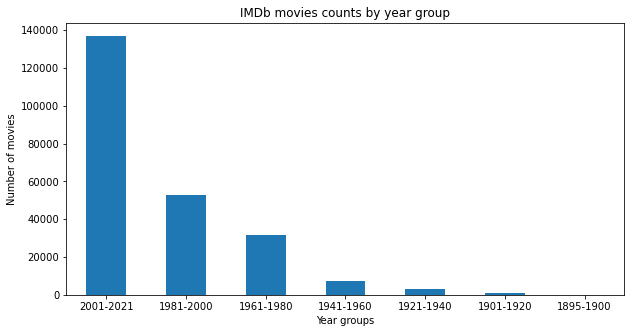

In [21]:

df2 = df_title_rating['year_group'].value_counts()


plt = df2.plot.bar(rot=0, figsize = (10,5))

plt.set_title('IMDb movies counts by year group')
plt.set_ylabel('Number of movies')
plt.set_xlabel("Year groups")

We can see from the bar plot that film production has been increased every 20 years from 1895 to 2021, especially the film industry boomed between 2001 and 2021, with film output nearly tripling over the previous two decades

<AxesSubplot:xlabel='year_group'>

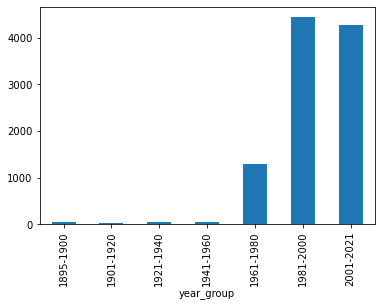

In [22]:
df_title_rating.groupby('year_group')['numVotes'].mean().plot.bar()

We can see that movies from year 1981-2000 have the most number of votes, movies from year 2001-2021 have the second most number of votes.

In [23]:
df_title_rating.groupby('year_group')['averageRating'].mean()

year_group
1895-1900    5.028571
1901-1920    5.537194
1921-1940    6.060590
1941-1960    6.205398
1961-1980    6.017210
1981-2000    5.991209
2001-2021    6.210716
Name: averageRating, dtype: float64

<AxesSubplot:xlabel='year_group'>

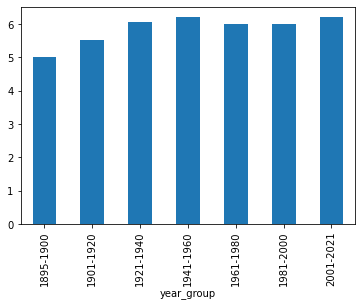

In [24]:
df_title_rating.groupby('year_group')['averageRating'].mean().plot.bar()

We can see that movies from year 1941-1960 and year 2001-2021 have the highest avg rating, movies from year 1895-1900 have the lowest avg rating. However, the average rating for movies across all year groups was between 5.35 and 6.23.

We assigned movie averageRating >= 7.0 as good rating movies, representing as 1;

movie averageRating < 7.0 as bad rating movies, representing as 0

In [25]:
df_merge['good rating'] = np.where(df_merge['averageRating'] >= 7.0, 1, 0)
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,"Action,Adventure,Fantasy",1971-1980,1
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,"Action,Adventure,Comedy",1971-1980,1
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,"Drama,Sci-Fi",1971-1980,1
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,"Drama,Music",1971-1980,0
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,"Drama,History,War",1971-1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2011-2021,1
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2011-2021,0
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,"Drama,Mystery,Thriller",2011-2021,0
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,"Biography,Drama,History",2011-2021,0


We only kept the first catigory of every genres, since the first one is the most siginficant.

In [26]:
df_merge['genres'] = df_merge['genres'].str.split(r'\,').str.get(0)
df_merge


,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,Action,1971-1980,1
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,Action,1971-1980,1
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,Drama,1971-1980,1
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,Drama,1971-1980,0
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,Drama,1971-1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2011-2021,1
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2011-2021,0
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,Drama,2011-2021,0
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,Biography,2011-2021,0


In [27]:
df2 = df_merge['genres'].value_counts() # 4 age groups
df2

Comedy         2254
Action         1967
Drama          1203
Adventure       744
Crime           421
Biography       344
Horror          267
Documentary      81
Animation        66
Fantasy          44
Mystery          29
Thriller         23
Romance          16
Family           10
Sci-Fi            9
\N                4
Western           2
Music             2
War               1
Musical           1
History           1
Name: genres, dtype: int64

using LabelEncoder encode genres to integers and save to dataframe as a new column(genres Encoding) for later prediction training.

In [28]:
from sklearn.preprocessing import *
le = LabelEncoder()
le.fit(df_merge['genres'])
df_merge['genresEcode'] = le.transform(df_merge['genres'].values).astype(float)


In [29]:
# df_title_rating.drop_duplicates(subset=['primaryTitle'], inplace = True)
df_merge

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating,genresEcode
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,Action,1971-1980,1,0.0
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,Action,1971-1980,1,0.0
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,Drama,1971-1980,1,7.0
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,Drama,1971-1980,0,7.0
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,Drama,1971-1980,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2011-2021,1,4.0
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2011-2021,0,1.0
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,Drama,2011-2021,0,7.0
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,Biography,2011-2021,0,3.0


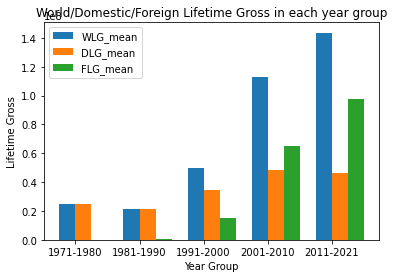

In [30]:

import numpy as np
import matplotlib.pyplot as plt
WLG_mean = df_merge.groupby('year_group')['WLG'].mean()
DLG_mean = df_merge.groupby('year_group')['DLG'].mean()
FLG_mean = df_merge.groupby('year_group')['FLG'].mean()
n=5
r = np.arange(n)
width = 0.25
  
plt.bar(r, WLG_mean, 
        width = width, 
        label='WLG_mean')
plt.bar(r + width, DLG_mean, 
        width = width,
        label='DLG_mean')
plt.bar(r + width + width, FLG_mean, 
        width = width,
        label='FLG_mean')
  
plt.xlabel("Year Group")
plt.ylabel("Lifetime Gross")
plt.title("World/Domestic/Foreign Lifetime Gross in each year group")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,["1971-1980", "1981-1990", "1991-2000", "2001-2010", "2011-2021"])
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

From above chart we can see that:

movies from year 2011-2021 has the highest avg Worldwide Lifetime Gross;

movies from year 2001-2010 has the highest avg Domestic Lifetime Gross;

movies from year 2011-2021 has the highest avg Foreign Lifetime Gross.

So we have a conclusion that movies from year 1971-2000 our avg Domestic Lifetime Gross is higher than avg Foreign Lifetime Gross, however, after year 2000, the avg Foreign Lifetime Gross exceeded our avg Domestic Lifetime Gross. 

**Analyze the trend of highest world gross earning genres in recent 10 years.**


Throughout movie history, the highest total earning movie genres are Action, Adventure, Comedy, Drama, Crime. 

In [280]:
##df = (df2[df2['genres'] =='Action'])

WLG_mean = []

for year in range(2010, 2022):
    #for genre in df2['genres'].unique():
        #WLG_mean[0].append(genre)
        WLG_mean.append((df2[df2['year'] ==year]).groupby('genres')['WLG'].mean())
        
    
    

In [286]:
df3 = pd.DataFrame(WLG_mean , index=(2010,2011,2012,2013,2014,2015,2016,2017,2018,2019, 2020,2021))
df3.sort_index()
df3 = df3[['Action','Adventure' ,'Comedy','Drama','Crime']]
df3
#df3.index 

genres,Action,Adventure,Comedy,Drama,Crime
2010,1.800203e+08,3.293453e+08,7.105630e+07,6.889388e+07,7.238110e+07
2011,1.821051e+08,2.365724e+08,9.572987e+07,6.664799e+07,8.922067e+07
2012,2.023833e+08,3.107833e+08,9.232235e+07,8.006594e+07,5.150003e+07
2013,1.758070e+08,3.084202e+08,7.123535e+07,1.115271e+08,1.268694e+08
2014,2.407574e+08,2.638373e+08,8.239932e+07,7.888930e+07,4.868413e+07
2015,2.497559e+08,2.726070e+08,8.476370e+07,9.685875e+07,7.094516e+07
2016,1.989202e+08,3.397432e+08,8.878500e+07,7.700185e+07,1.414098e+08
2017,2.416742e+08,2.390017e+08,7.947469e+07,8.532132e+07,8.693529e+07
2018,2.609429e+08,1.772796e+08,1.055360e+08,1.114479e+08,8.149384e+07
2019,2.505010e+08,3.132630e+08,8.951305e+07,9.296264e+07,1.753356e+08


<AxesSubplot:>

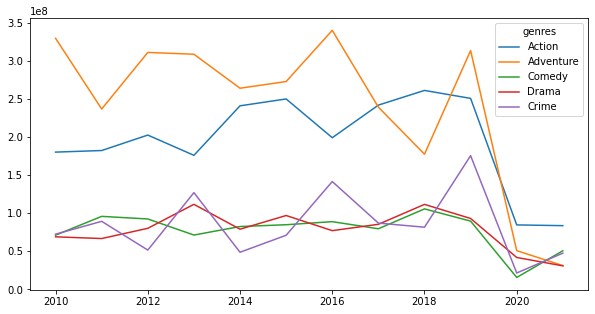

In [287]:

df3.plot.line()
#df3.plot.bar(stacked=True) 

**By observing the trend graph, All movie genres' earnings were decreased over 70% in 2020 (probably impacted by COVID-19), and Action, and Adventure genres having the highest earnings in recent 10 years.**

# Data Prediction

**Now we want to predict the if a movie performs better in domestic than foreign regions based on their gross earnings from year 2008 with rating 7.0 .**

We created a boolean column 'df>=fp' to represent if dpercent is larger or equal to fpercent. If df>=fp, shows 1, if not, shows 0.

In [325]:
df_merge['df>=fp'] = np.where(df_merge['dpercent'] >= df_merge['fpercent'], 1, 0)
df_merge
# df_merge['fpercent'].unique()

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating,genresEcode,df>=fp
0,Star Wars: Episode IV - A New Hope,307263857.0,307263857.0,0.0,100.0,0.0,1977,tt0076759,8.6,1271862,Star Wars: Episode IV - A New Hope,Star Wars,1977,Action,1971-1980,1,0.0,1
1,Smokey and the Bandit,126737428.0,126737428.0,0.0,100.0,0.0,1977,tt0076729,7.0,47603,Smokey and the Bandit,Smokey and the Bandit,1977,Action,1971-1980,1,0.0,1
2,Close Encounters of the Third Kind,116395460.0,116395460.0,0.0,100.0,0.0,1977,tt0075860,7.6,191221,Close Encounters of the Third Kind,Close Encounters of the Third Kind,1977,Drama,1971-1980,1,7.0,1
3,Saturday Night Fever,94213184.0,94213184.0,0.0,100.0,0.0,1977,tt0076666,6.8,75412,Saturday Night Fever,Saturday Night Fever,1977,Drama,1971-1980,0,7.0,1
4,A Bridge Too Far,50750000.0,50750000.0,0.0,100.0,0.0,1977,tt0075784,7.4,54258,A Bridge Too Far,A Bridge Too Far,1977,Drama,1971-1980,1,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12940,"Prvok, Sampon, Tecka a Karel",2709959.0,0.0,2709959.0,0.0,100.0,2021,tt10704730,7.4,30,"Prvok, Sampon, Tecka a Karel","Prvok, Sampon, Tecka a Karel",2021,Comedy,2011-2021,1,4.0,0
12942,Me contro te - Il mistero della scuola incantata,2700000.0,0.0,2700000.0,0.0,100.0,2021,tt14146688,3.6,26,Me contro te - Il mistero della scuola incantata,Me contro te - Il mistero della scuola incantata,2021,Adventure,2011-2021,0,1.0,0
12943,Recalled,2696945.0,0.0,2696945.0,0.0,100.0,2021,tt14527836,6.9,2780,Recalled,Recalled,2021,Drama,2011-2021,0,7.0,0
12944,Benedetta,2652725.0,0.0,2652725.0,0.0,100.0,2021,tt6823148,6.6,883,Benedetta,Benedetta,2021,Biography,2011-2021,0,3.0,0


In [326]:
X_train = df_merge[["year", "averageRating"]]
y_train = df_merge["df>=fp"]

X_train_sc = (X_train - X_train.mean()) / X_train.std()

In [327]:
x_new = pd.Series()
x_new["year"] = 2008
x_new["averageRating"] = 7.0

x_new_sc = (x_new - X_train.mean()) / X_train.std()
x_new_sc

<ipython-input-327-5964ae9459c4>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


year             0.567563
averageRating    0.685363
dtype: float64

In [328]:
import numpy as np
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
dists_sorted = dists.sort_values()
dists_sorted

9028     0.000000
9187     0.000000
9033     0.000000
9163     0.000000
9026     0.000000
           ...   
9954     5.372611
4922     5.376799
12567    5.556199
5289     5.556199
12599    5.654004
Length: 7489, dtype: float64

In [329]:
inds_nearest = dists_sorted.index[:15]
inds_nearest

Int64Index([9028, 9187, 9033, 9163, 9026, 9049, 9159, 9030, 8864, 8688, 8700,
            8901, 8837, 8775, 8812],
           dtype='int64')

In [321]:
df_merge.loc[inds_nearest]

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating,genresEcode,df>=fp
9028,Cloverfield,172394180.0,80048433.0,92345747.0,46.4,53.6,2008,tt1060277,7.0,381776,Cloverfield,Cloverfield,2008,Action,2001-2010,1,0.0,0
9187,Traitor,27674464.0,23530831.0,4143633.0,85.0,15.0,2008,tt0988047,7.0,56648,Traitor,Traitor,2008,Action,2001-2010,1,0.0,1
9033,Burn After Reading,163728902.0,60355347.0,103373555.0,36.9,63.1,2008,tt0887883,7.0,319502,Burn After Reading,Burn After Reading,2008,Comedy,2001-2010,1,4.0,0
9163,Gomorrah,34861529.0,1579146.0,33282383.0,4.5,95.5,2008,tt0929425,7.0,47643,Gomorrah,Gomorra,2008,Crime,2001-2010,1,5.0,0
9026,Tropic Thunder,195702811.0,110515313.0,85187498.0,56.5,43.5,2008,tt0942385,7.0,392873,Tropic Thunder,Tropic Thunder,2008,Action,2001-2010,1,0.0,1
9049,Rambo,113244290.0,42754105.0,70490185.0,37.8,62.2,2008,tt0462499,7.0,223521,Rambo,Rambo,2008,Action,2001-2010,1,0.0,0
9159,The Magic Hour,36023586.0,0.0,36023586.0,0.0,100.0,2008,tt1077089,7.0,1307,The Magic Hour,Za majikku awâ,2008,Comedy,2001-2010,1,4.0,0
9030,Hellboy II: The Golden Army,168319243.0,75986503.0,92332740.0,45.1,54.9,2008,tt0411477,7.0,261718,Hellboy II: The Golden Army,Hellboy II: The Golden Army,2008,Action,2001-2010,1,0.0,0
8864,Becoming Jane,37311672.0,18670946.0,18640726.0,50.0,50.0,2007,tt0416508,7.0,59731,Becoming Jane,Becoming Jane,2007,Biography,2001-2010,1,3.0,1
8688,Transformers,709709780.0,319246193.0,390463587.0,45.0,55.0,2007,tt0418279,7.0,610780,Transformers,Transformers,2007,Action,2001-2010,1,0.0,0


In [330]:
df_merge.loc[inds_nearest]["df>=fp"].value_counts()

0    11
1     4
Name: df>=fp, dtype: int64

In [331]:
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Standardize the training and test data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
y_train = df_merge["df>=fp"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)
# print(model.classes_)

array([0.2])

Here I got a result 0.2, since 4 of the nearest 15 neighbors have dpercent >= fpercent, and 11 of the nearest 15 neighbors have dpercent < fpercent.

In [332]:
clf = LogisticRegression().fit(X=X_train_st, y=y_train)
clf.fit(X=X_train_st, y=y_train)
clf.predict_proba(X=X_new_st)
# print(clf.classes_)

array([[0.56956203, 0.43043797]])

And the predict_proba gives the result of 0.57 of having dpercent < fpercent and  0.43 of having  dpercent >= fpercent. This result is similar to our prediction.

In 2008, across the whole movie industry, 43% of good movies (rating = 7.0) performs well in the US, 57% performs better in foreign countries


**Now we want to predict if a movie from year 2012 with genresEcode=5.0(Crime) can be considered as a "good rating" movie  .**

In [333]:
X_train = df_merge[["year", "genresEcode"]]
y_train = df_merge["good rating"]

X_train_sc = (X_train - X_train.mean()) / X_train.std()

In [334]:
x_new = pd.Series()
x_new["year"] = 2012
x_new["genresEcode"] = 5.0

x_new_sc = (x_new - X_train.mean()) / X_train.std()
x_new_sc

<ipython-input-334-1ee03349e052>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


year           0.899516
genresEcode    0.452138
dtype: float64

In [335]:
import numpy as np
dists = np.sqrt(((X_train_sc - x_new_sc) ** 2).sum(axis=1))
dists_sorted = dists.sort_values()
dists_sorted

10236    0.000000
10288    0.000000
10324    0.000000
10263    0.000000
10434    0.082988
           ...   
9637     4.735573
9589     4.758785
7738     4.791237
12753    4.791237
983      5.070458
Length: 7489, dtype: float64

In [336]:
inds_nearest = dists_sorted.index[:15]
inds_nearest

Int64Index([10236, 10288, 10324, 10263, 10434, 10415, 10651, 10473, 10517,
            10524, 10534, 10535,  9990,  9973, 10095],
           dtype='int64')

In [337]:
df_merge.loc[inds_nearest]

,Title,WLG,DLG,FLG,dpercent,fpercent,year,tconst,averageRating,numVotes,primaryTitle,originalTitle,startYear,genres,year_group,good rating,genresEcode,df>=fp
10236,Savages,82966152.0,47382068.0,35584084.0,57.1,42.9,2012,tt1615065,6.5,126948,Savages,Savages,2012,Crime,2011-2021,0,5.0,1
10288,Killing Them Softly,37930465.0,15026056.0,22904409.0,39.6,60.4,2012,tt1764234,6.2,137692,Killing Them Softly,Killing Them Softly,2012,Crime,2011-2021,0,5.0,0
10324,The Raven,29699345.0,16008272.0,13691073.0,53.9,46.1,2012,tt1486192,6.4,83499,The Raven,The Raven,2012,Crime,2011-2021,0,5.0,1
10263,Lawless,55404159.0,37400127.0,18004032.0,67.5,32.5,2012,tt1212450,7.3,233759,Lawless,Lawless,2012,Crime,2011-2021,1,5.0,1
10434,American Hustle,251171807.0,150117807.0,101054000.0,59.8,40.2,2013,tt1800241,7.2,460643,American Hustle,American Hustle,2013,Crime,2011-2021,1,5.0,1
10415,Now You See Me,351723989.0,117723989.0,234000000.0,33.5,66.5,2013,tt1670345,7.2,617324,Now You See Me,Now You See Me,2013,Crime,2011-2021,1,5.0,0
10651,Trance,24261569.0,2328743.0,21932826.0,9.6,90.4,2013,tt1924429,6.9,111610,Trance,Trance,2013,Crime,2011-2021,0,5.0,0
10473,Prisoners,122126687.0,61002302.0,61124385.0,50.0,50.0,2013,tt1392214,8.1,632403,Prisoners,Prisoners,2013,Crime,2011-2021,1,5.0,1
10517,The Counselor,71009334.0,16973715.0,54035619.0,23.9,76.1,2013,tt2193215,5.3,98283,The Counselor,The Counselor,2013,Crime,2011-2021,0,5.0,0
10524,The Call,68572631.0,51872378.0,16700253.0,75.6,24.4,2013,tt1911644,6.7,116370,The Call,The Call,2013,Crime,2011-2021,0,5.0,1


In [338]:
df_merge.loc[inds_nearest]["good rating"].value_counts()

0    8
1    7
Name: good rating, dtype: int64

In [339]:
# Standardize the training and test data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
y_train = df_merge["good rating"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X=X_train_st, y=y_train)
model.predict(X=X_new_st)
# print(model.classes_)

array([0.46666667])

Here I got a result 0.47, since 7 of the nearest 15 neighbors have good rating, and 8 of the nearest 15 neighbors have bad rating.

In [315]:
clf = LogisticRegression().fit(X=X_train_st, y=y_train)
clf.fit(X=X_train_st, y=y_train)
clf.predict_proba(X=X_new_st)
# print(clf.classes_)

array([[0.69937016, 0.30062984]])

And the predict_proba gives the result of 0.69876809 of having bad rating and 0.30123191 of having good rating. This result is similar to our prediction.

In 2012, across the whole movie industry, 30% of Crime movies have good ratings(above 7.0), 70% have bad ratings(below 7.0)

**We have predicted the good rating rate of crime movies, Now we combine ML prediction with analysis of which genres are likely to receive high ratings(rating>7.0).**

In [174]:

X_train = df_merge[["genresEcode"]]
y_train = df_merge["good rating"]

X_train_sc = (X_train - X_train.mean()) / X_train.std()
x_new = pd.Series()
x_new["genresEcode"] = 5.0

x_new_sc = (x_new - X_train.mean()) / X_train.std()
x_new_sc
# Standardize the training and test data
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
y_train = df_merge["good rating"]

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X=X_train_st, y=y_train)
#model.predict(X=X_new_st)
clf = LogisticRegression().fit(X=X_train_st, y=y_train)
clf.fit(X=X_train_st, y=y_train)
clf.predict_proba(X=X_new_st)
# print(model.classes_)

<ipython-input-174-08ff10f9f60a>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  x_new = pd.Series()


array([[0.7242905, 0.2757095]])

In [181]:

result = []
for i in df_merge["genresEcode"].unique():
    #print(i)
    X_train = df_merge[["genresEcode"]]
    y_train = df_merge["good rating"]

    X_train_sc = (X_train - X_train.mean()) / X_train.std()
    x_new = pd.Series([],dtype=pd.StringDtype())
    x_new["genresEcode"] = i

    x_new_sc = (x_new - X_train.mean()) / X_train.std()
    x_new_sc
    # Standardize the training and test data
    scaler = StandardScaler()
    X_train_st = scaler.fit_transform(X_train)
    X_new_st = scaler.transform(pd.DataFrame([x_new])) # needs to be a DataFrame
    y_train = df_merge["good rating"]

    # Fit k-nearest neighbors
    model = KNeighborsRegressor(n_neighbors=15)
    model.fit(X=X_train_st, y=y_train)
    #model.predict(X=X_new_st)
    clf = LogisticRegression().fit(X=X_train_st, y=y_train)
    clf.fit(X=X_train_st, y=y_train)

    result.append(clf.predict_proba(X=X_new_st)) 

In [186]:
re = pd.DataFrame(np.concatenate(result))
df_good = df_merge[['genres', 'genresEcode']]
#re['genresEcode'] = re.index
#re['genresEcode'] = le.inverse_transform(re.index)
re.index = le.inverse_transform(re.index)
re= re.rename(columns={0: "bad_proba", 1: "good_proba"})
re

,bad_proba,good_proba
Action,0.740713,0.259287
Adventure,0.717544,0.282456
Animation,0.737480,0.262520
Biography,0.727626,0.272374
Comedy,0.703756,0.296244
Crime,0.696717,0.303283
Documentary,0.724291,0.275709
Drama,0.730936,0.269064
Family,0.720930,0.279070
Fantasy,0.693163,0.306837


<AxesSubplot:>

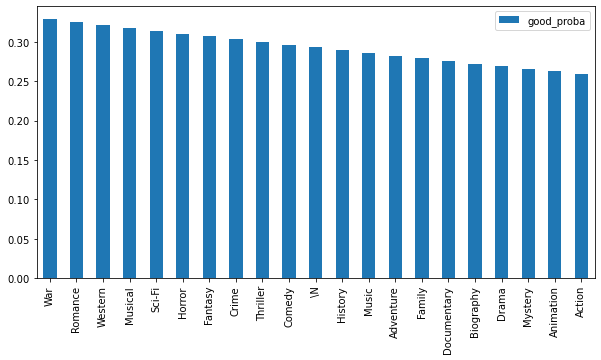

In [190]:
re.sort_values("good_proba", ascending=False)[["good_proba"]].plot.bar(stacked=True)


By observing the chart, war movies are more likely to receive good ratings (>7.0) at 33%, then romance, western are also having a higher chance receive good ratings than other genres.

**=============End of Document==========**